In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data from /input/train.csv
data = pd.read_csv("./input/train.csv")

In [15]:
data.describe()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,58781.500000,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076,0.093285
std,33937.947861,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110,0.290833
min,0.000000,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976,0.000000
25%,29390.750000,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136,0.000000
50%,58781.500000,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375,0.000000
75%,88172.250000,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290,0.000000
max,117563.000000,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837,1.000000


In [3]:
X = data.drop(['Class', 'id'], axis=1)
y = data['Class']

In [4]:
list(X.columns)

['Mean_Integrated',
 'SD',
 'EK',
 'Skewness',
 'Mean_DMSNR_Curve',
 'SD_DMSNR_Curve',
 'EK_DMSNR_Curve',
 'Skewness_DMSNR_Curve']

array([[<AxesSubplot:title={'center':'Mean_Integrated'}>,
        <AxesSubplot:title={'center':'SD'}>,
        <AxesSubplot:title={'center':'EK'}>],
       [<AxesSubplot:title={'center':'Skewness'}>,
        <AxesSubplot:title={'center':'Mean_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'SD_DMSNR_Curve'}>],
       [<AxesSubplot:title={'center':'EK_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'Skewness_DMSNR_Curve'}>,
        <AxesSubplot:>]], dtype=object)

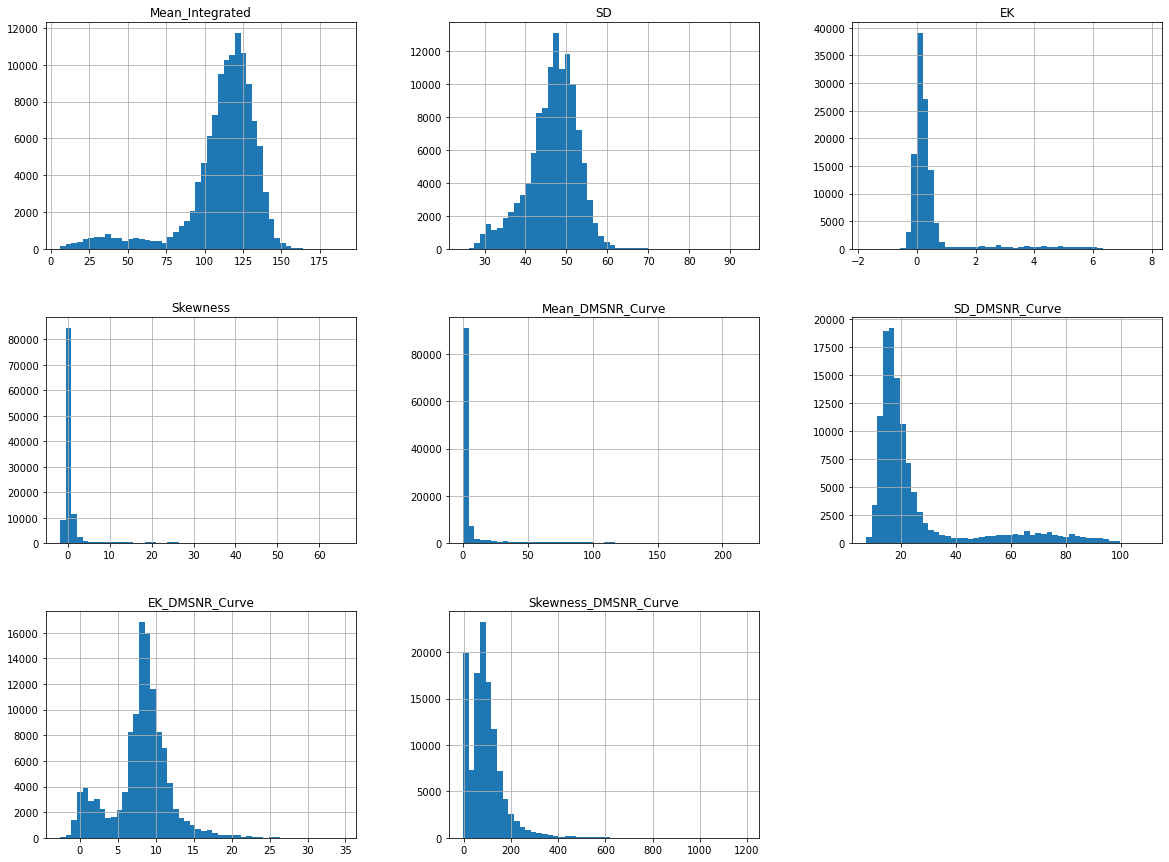

In [14]:
X.hist(bins=50  , figsize=(20, 15))

<AxesSubplot:>

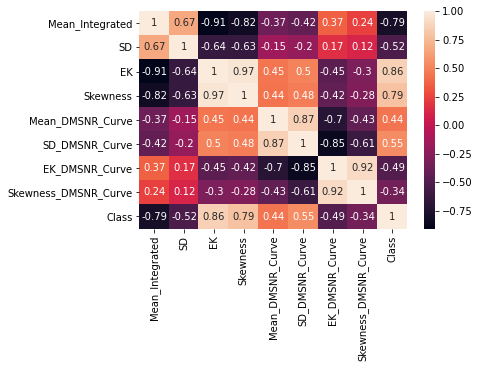

In [10]:
sns.heatmap(data.drop(['id'], axis=1).corr(), annot=True)

<Figure size 1152x1152 with 0 Axes>

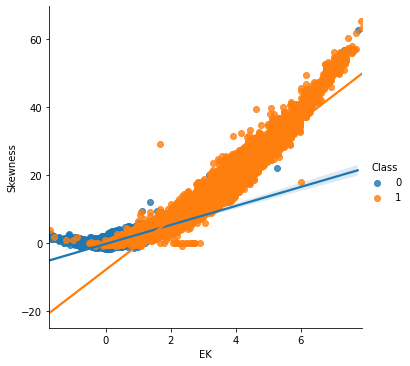

In [6]:
plt.figure(figsize=(16, 16))

sns.lmplot(x="EK", y="Skewness", data=data, hue='Class')

<Figure size 1152x1152 with 0 Axes>

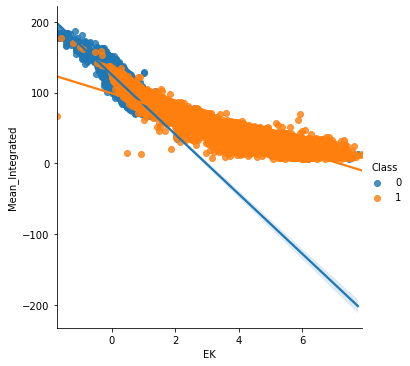

In [12]:
plt.figure(figsize=(16, 16))

sns.lmplot(x="EK", y="Mean_Integrated", data=data, hue='Class', fit_reg=True)

## Closer look into the data

In [18]:
X.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076
std,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110
min,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976
25%,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136
50%,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375
75%,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290
max,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837


In [11]:
y.value_counts()

0    106597
1     10967
Name: Class, dtype: int64

<Axes: xlabel='EK', ylabel='Count'>

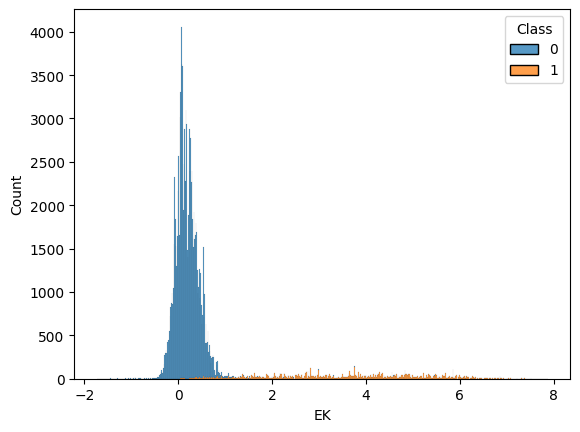

In [13]:
# investigating important data patterns with graphs

sns.histplot(data, x="EK", hue="Class", multiple="stack")

In [14]:
# percentage of data points in Class 0 with EK > 1.5
print(len(data[(data['Class'] == 0) & (data['EK'] > 2)]) / len(data[data['Class'] == 0]))
# percentage of data points in Class 1 with EK > 1.5
print(len(data[(data['Class'] == 1) & (data['EK'] > 2)]) / len(data[data['Class'] == 1]))

0.0011538786269782453
0.8004012036108324


In [16]:
# percentage of Class 0 with EK > 1.5
print(len(data[(data['Class'] == 0) & (data['EK'] > 3)]) / len(data[data['EK'] > 3]))

0.010952236081533314


<AxesSubplot:xlabel='SD', ylabel='Density'>

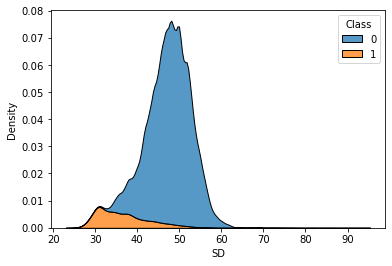

In [45]:
sns.kdeplot(data=data, x="SD", hue="Class", multiple="stack")